# Problem set 4
  
 
## Li Ruixue



### 1. Multiple Linear Regression
#### (a) Import data and replace missing values

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [212]:
# there are a few horsepower numbers being represented with ?, replacing with NaN
df = pd.read_csv("auto.csv", na_values = "?")

#### (b) Plot scatterplot matrix 

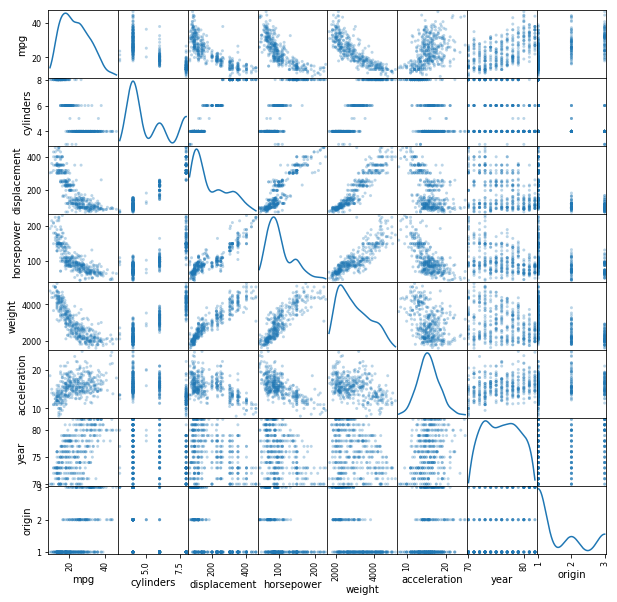

In [216]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (10,10), diagonal = 'kde')
plt.show()

#### (c) Compute correlation matrix for quantitative variables

In [260]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


#### (d) Estimate multiple linear regression model

In [219]:
df['const'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1


In [220]:
import statsmodels.api as sm
endog_vars_1d = 'mpg'
exog_vars_1d = ['cylinders','displacement','horsepower','weight','acceleration','year','origin','const']
reg_1d = sm.OLS(endog = df[endog_vars_1d], exog = df[exog_vars_1d], missing = 'drop')
results_1d = reg_1d.fit()
print(results_1d.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        18:55:35   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526   

**i.** significant at 1%: 
$\beta_0$ (constant), $\beta_2$ (displacement), $\beta_4$ (weight), $\beta_6$ (year), $\beta_7$ (origin)   
**ii.** not significant at 10%: $\beta_1$ (cylinders), $\beta_3$ (horsepower), $\beta_5$ (acceleration)  
**iii.** $\beta_6$: holding other variables constant, if the car is made one year later, the average mpg is 0.5836 miles higher  
  
#### (e) non-linear relationship: 
displacement, horsepower, weight

**i.** Estimate new regression model

In [221]:
import numpy as np
df['displacement_2'] = df['displacement']**2
df['horsepower_2'] = df['horsepower']**2
df['weight_2'] = df['weight']**2
df['acceleration_2'] = df['acceleration']**2
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,displacement_2,horsepower_2,weight_2,acceleration_2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,16900.0,12278016,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,27225.0,13638249,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,22500.0,11806096,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,22500.0,11785489,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,19600.0,11895601,110.25


In [222]:
endog_vars_1e = 'mpg'
exog_vars_1e = ['cylinders','displacement','horsepower','weight','acceleration','year','origin','const',
               'displacement_2','horsepower_2','weight_2','acceleration_2']
reg_1e = sm.OLS(endog = df[endog_vars_1e], exog = df[exog_vars_1e], missing = 'drop')
results_1e = reg_1e.fit()
print(results_1e.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        19:04:57   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylinders          0.2519      0.326      0.

**ii.** Adjusted R-squared: 0.866, which is slightly better than that in part (d) 0.818, so this model fits the data better.   
**iii.** Both are not significant at 10%  
**iv.** It's more insignificant, with p-value 0.44, larger than 0.128 in part (d)  

  
#### (f) Predict with model from (e)

In [229]:
r = results_1e.predict(exog=[6, 200, 100, 3100, 15.1, 99, 1, 1, 200**2, 100**2, 3100**2, 15.1**2])
print('The predicted value is: ' + str(r[0]))

The predicted value is: 38.7321110977203


### 2. KNN
#### (a) Compute distance to (0,0,0)

In [264]:
obs = pd.DataFrame([[0,3,0,'red'],[2,0,0,'red'],[0,1,3,'red'],
                    [0,1,2,'green'],[-1,0,1,'green'],[1,1,1,'red']])
obs.columns = ['x1','x2','x3','y']
obs

,x1,x2,x3,y
0,0,3,0,red
1,2,0,0,red
2,0,1,3,red
3,0,1,2,green
4,-1,0,1,green
5,1,1,1,red


In [265]:
import numpy as np
obs['Eucl.D'] = np.sqrt((obs['x1']-0)**2 + (obs['x2']-0)**2 + (obs['x3']-0)**2)
obs

,x1,x2,x3,y,Eucl.D
0,0,3,0,red,3.000000
1,2,0,0,red,2.000000
2,0,1,3,red,3.162278
3,0,1,2,green,2.236068
4,-1,0,1,green,1.414214
5,1,1,1,red,1.732051


In [275]:
def predict(df, k):
    df2 = df.sort_values(by = ['Eucl.D'])
    return df2.iloc[:k].mode().y[0]
    

In [276]:
predict(obs, 1)

'green'

#### (b) KNN prediction with K=1
is green, because the closest point is obs.5, which is green.

In [277]:
predict(obs, 3)

'red'

#### (c) KNN prediction with K = 3
is red, because the 3 closest points are obs.5, obs.6, obs.2, two of which are red.

#### (d) If decision boundary is non-linear, we expect K to be:
Small. The smaller K is, the more non-linear the decision boundary is because the decision will be depending on a smaller number of K, and changing each neighbor has a larger effect on the decision.

#### (e) Predict with Python

In [266]:
from sklearn import datasets, neighbors, linear_model
x = obs[['x1','x2','x3']]
x

,x1,x2,x3
0,0,3,0
1,2,0,0
2,0,1,3
3,0,1,2
4,-1,0,1
5,1,1,1


In [267]:
y = obs[['y']]
print(y)

       y
0    red
1    red
2    red
3  green
4  green
5    red


In [268]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(x, y)
knn.predict([[1,1,1]])

/Users/liruixue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array(['green'], dtype=object)

Prediction with K=2 is green.

### 3 Logit regression

#### (a) Use statsmodel.api to estimate the logit regression and report significant regressors

In [240]:
df = pd.read_csv("auto.csv", na_values = "?")
df2 = df.dropna()
m = df2['mpg'].median()
print(m)
df2['mpg_high'] = np.where(df2['mpg'] > m, 1,0)
df2['const'] = 1
df2.isnull().sum()

22.75


/Users/liruixue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/liruixue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
mpg_high        0
const           0
dtype: int64

In [262]:
x = df2[['const','cylinders','displacement','horsepower','weight','acceleration','year','origin']]
y = df2[['mpg_high']]

In [242]:
import statsmodels.api as sm

In [243]:
model = sm.Logit(y,x)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   9.0000  
Dependent Variable: mpg_high         Pseudo R-squared: 0.710   
Date:               2018-02-04 19:18 AIC:              173.5398
No. Observations:   392              BIC:              205.3099
Df Model:           7                Log-Likelihood:   -78.770 
Df Residuals:       384              LL-Null:          -271.71 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
const         -17.1549   5.7638 -2.9763 0.0029 -28.4517 -5.8580
cylinders      -0.1626   0.4232 -0.3842 0.7008  -0.9920  0.6669
displacement    0.0021   0.0120  0.1741 0.8618  -0.0215  0.0257
horsepower     -0.0410   0.0239 -1.7183 0.0857  -0.0878  0.0058
weight         -0.0043   0.0011 -3.7844 0.0002  -0.0066 -0.0021
acceleration    0.0161   0.1415  0.1136 0.9096  -0.2612  0.2933
year            0.4295   0.0752  5.7090 0.0000   0.2820  0.5769
origin          0.4773   0.3620  1.3186 0.1873  -0.2322  1.1869
===============================================================

"""

Regressors significant at 5% level: **weight**, **year**

#### (b) Divide into tra and test set

In [244]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=10)

#### (c) Use scikit-learn to estimate

In [245]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/liruixue/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [246]:
result2 = pd.DataFrame(lr.coef_)
result2.columns = ['const','cylinders','displacement','horsepower','weight','acceleration','year','origin']
result2

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.068653,-0.658722,0.005659,-0.038803,-0.004999,-0.142134,0.299977,-0.150397


The coefficients are listed above.

#### (d) Predict for test set and calculate confusion matrix and classification report.

In [249]:
y_pred = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(cm)

The confusion matrix is:
[[86 13]
 [12 85]]


In [250]:
cr = classification_report(y_test, y_pred)
print('The classification report is')
print(cr)

The classification report is
             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



This model predicts low mpg and high mpg almost equally well. 